The NYC Housing dataset contains information about the New York City Housing and Preservation Department's (HPD) affordable housing development projects. It includes data on building characteristics, affordability levels, location, and ownership information for all properties in the dataset.

Columns

Job #: A unique identification number assigned to each construction job record.

Borough: The borough in which the construction job is located (Manhattan, Brooklyn, Queens, Bronx, or Staten Island).

House #: The street number of the building where the construction job is located.

Street Name: The name of the street where the construction job is located.

Block: The block number of the building where the construction job is located.

Lot: The lot number of the building where the construction job is located.

Bin #: The Building Identification Number (BIN) assigned by the NYC Department of Buildings.

Job Type: The type of construction job (A1, A2, B, NB, DM, etc.).

Community - Board: The number of the community board responsible for the area where the construction job is located.

Curb Cut: Indicates if a new curb cut is being added as part of the construction job.

Fully Permitted: Indicates if the construction job has been fully permitted by the NYC Department of Buildings.

Initial Cost: The estimated cost of the construction job.

Proposed Zoning Sqft: The proposed square footage of the building after construction.

Horizontal Enlrgmt: The proposed horizontal enlargement of the building after construction.

Vertical Enlrgmt: The proposed vertical enlargement of the building after construction.

Enlargement SQ Footage: The total square footage of the proposed enlargement.

Zoning Dist1: The zoning district of the building where the construction job is located.

Job Description: A brief description of the construction job.

Dataset Use The NYC Housing dataset is a valuable resource for researchers, policymakers, and developers interested in affordable housing in New York City. It can be used to analyze trends in affordable housing development, identify neighborhoods with high levels of affordable housing, and evaluate the effectiveness of various affordable housing programs.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR # Support Vector Regression
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
# Load the dataset
housing_data = pd.read_csv('/Users/lientran/Documents/Machine_Learning _Project/Machine-learning/House Price NewYork/apartment_cost_list.csv')

In [4]:
housing_data.shape

(19613, 18)

In [5]:
housing_data.head()

,Job #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Curb Cut,Fully Permitted,Initial Cost,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Zoning Dist1,Job Description
0,123768976,MANHATTAN,1598,2ND AVENUE,1545,49,1049907,A2,108,NaN,NaN,$65000.00,0,NaN,NaN,0,C1-9,INTERIOR RENOVATION TO COMBINE APARTMENT 2E AN...
1,140922893,MANHATTAN,160,E 89 ST,1517,43,1048094,A2,108,NaN,07/14/2020,$85000.00,0,NaN,NaN,0,R8B,HEREBY FILING APPLICATION FOR THE INTERIOR REN...
2,301773579,BROOKLYN,65,GATES AVENUE,1962,86,3056039,A1,302,NaN,05/23/2007,$60000.00,0,NaN,NaN,0,R6,Change existing four story and basement brick ...
3,301976057,BROOKLYN,1401,OCEAN AVENUE,7584,35,3206621,A2,314,NaN,02/28/2006,$75000.00,0,NaN,NaN,0,NaN,COMBINING OF APARTMENT 4A &amp; 4L.NO CHANGEIN...
4,301989276,BROOKLYN,154,NOBLE STREET,2573,10,3065099,A1,301,NaN,09/29/2006,$40000.00,0,NaN,NaN,0,C4-3,New C of O for existing building. New duplex a...


In [6]:
housing_data.isna().sum()

Job #                         0
Borough                       0
House #                       0
Street Name                   0
Block                         0
Lot                           0
Bin #                         0
Job Type                      0
Community - Board             0
Curb Cut                  19597
Fully Permitted            3988
Initial Cost                  0
Proposed Zoning Sqft          0
Horizontal Enlrgmt        19450
Vertical Enlrgmt          19371
Enlargement SQ Footage        0
Zoning Dist1               2096
Job Description               0
dtype: int64

In [7]:

#housing_data.info()
housing_data.drop(['Horizontal Enlrgmt','Vertical Enlrgmt','Curb Cut','Zoning Dist1'],axis = 1, inplace = True)

In [8]:
housing_data.isna().sum()

Job #                        0
Borough                      0
House #                      0
Street Name                  0
Block                        0
Lot                          0
Bin #                        0
Job Type                     0
Community - Board            0
Fully Permitted           3988
Initial Cost                 0
Proposed Zoning Sqft         0
Enlargement SQ Footage       0
Job Description              0
dtype: int64

In [9]:
housing_data.dropna(inplace = True) 
housing_data.head()

,Job #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Fully Permitted,Initial Cost,Proposed Zoning Sqft,Enlargement SQ Footage,Job Description
1,140922893,MANHATTAN,160,E 89 ST,1517,43,1048094,A2,108,07/14/2020,$85000.00,0,0,HEREBY FILING APPLICATION FOR THE INTERIOR REN...
2,301773579,BROOKLYN,65,GATES AVENUE,1962,86,3056039,A1,302,05/23/2007,$60000.00,0,0,Change existing four story and basement brick ...
3,301976057,BROOKLYN,1401,OCEAN AVENUE,7584,35,3206621,A2,314,02/28/2006,$75000.00,0,0,COMBINING OF APARTMENT 4A &amp; 4L.NO CHANGEIN...
4,301989276,BROOKLYN,154,NOBLE STREET,2573,10,3065099,A1,301,09/29/2006,$40000.00,0,0,New C of O for existing building. New duplex a...
5,302000974,BROOKLYN,501,HICKS STREET,321,7501,3003731,A2,306,12/12/2005,$40000.00,0,0,ERECTION OF MEZZANINE IN EXISTING APARTMENT #4...


In [10]:
# Descriptive Statistics
print(housing_data.describe())

              Job #         Block           Lot         Bin #  \
count  1.562500e+04  15625.000000  15625.000000  1.562500e+04   
mean   1.599860e+08   1526.737984   1249.233472  1.487665e+06   
std    8.999149e+07   1511.712550   2752.822002  9.159169e+05   
min    1.021331e+08      0.000000      0.000000  1.000055e+06   
25%    1.047283e+08    803.000000     17.000000  1.028688e+06   
50%    1.214604e+08   1242.000000     36.000000  1.046917e+06   
75%    1.407101e+08   1556.000000     66.000000  1.083401e+06   
max    5.203838e+08  16188.000000   9007.000000  5.133723e+06   

       Community - Board  Proposed Zoning Sqft  Enlargement SQ Footage  
count       15625.000000          15625.000000            15625.000000  
mean          149.459520            484.046592               12.450880  
std            88.616171           9234.257479              136.476878  
min           101.000000              0.000000                0.000000  
25%           105.000000              0.000000   

As observed,The Proposed Zoning Sqft has min from 0 and max 724475 while the median (50%) is 0, which indicates that a skewed distribution has a long tail on the upper end. Showing that the development projects mostly affect to a spacific area.

The Enlargement SQ Footage has a small mean and standard deviation, indicating that most of the development projects do not involve significant enlargements.

In The Community - Board, the value of Q1,Q2,Q3 are close together indicates that the distibution might be symmetric roughly but long tail at the upper end due to large 100th quartile. It seems that the development projects wide spread across the various community boards in New York City.

In [11]:
# Visualization - Scatter plot
import plotly.express as px

fig = px.scatter(housing_data, x='Initial Cost', y='Proposed Zoning Sqft', color_discrete_sequence=['magenta'])
fig.show()

In [12]:
import plotly.express as px

color_mapping = {'A1': 'red', 'A2': 'green', 'A3': 'blue'}

fig = px.histogram(housing_data, x="Job Type", color='Job Type', color_discrete_map=color_mapping)
fig.show()

In [13]:
import plotly.express as px


custom_colors = ['#FF5733']
fig = px.histogram(housing_data, x="Initial Cost", color_discrete_sequence=custom_colors)
fig.show()

In [15]:
# Correlation Analysis

housing_data = pd.get_dummies(housing_data, columns=['MANHATTAN'])


correlation_matrix = housing_data.corr()
print(correlation_matrix)

KeyError: "None of [Index(['MANHATTAN'], dtype='object')] are in the [columns]"

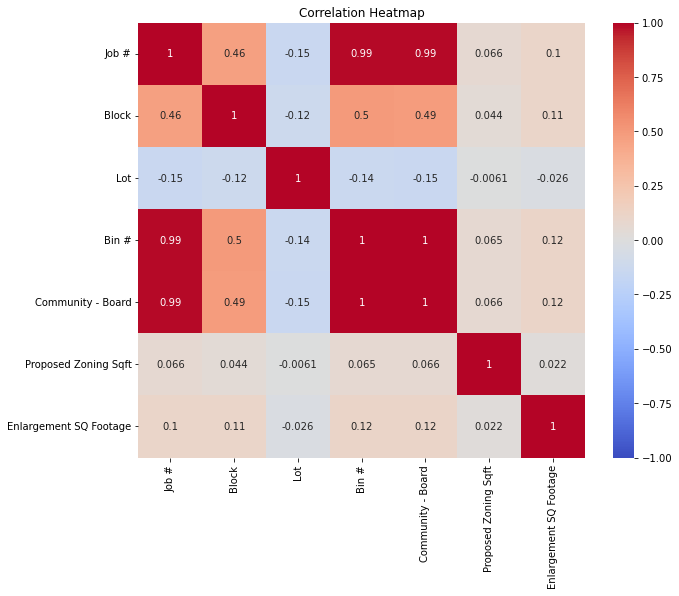

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = housing_data.corr()

# Set up the heatmap using Seaborn
plt.figure(figsize=(10, 8))  # Set the size of the figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation Heatmap')
plt.show()


Positive correlations are shown in warm colors (reds), negative correlations in cool colors (blues), and no correlation in shades of neutral color. This visualization can help you quickly identify strong and weak relationships between variables in the dataset.
The correlation coefficient is a measure of the strength and direction of the linear relationship between two variables.

Being seen that Job # column is positively correlated with the Block, Bin #, and Community - Board columns, with correlation coefficients of 0.46, 0.99, and 0.99, respectively. This indicates that as the values in the Job # column increase, the values in these other variables also tend to increase.

Also, the Lot has a weak negative correlation with the others, correlation coefficients ranges from -0.03 to -0.15. These numbers show that there is less linear relationship between the Lot and the other variables in the dataset.

In [ ]:
# Convert Job Type to numerical using label encoding
le = LabelEncoder()
housing_data['Job Type'] = le.fit_transform(housing_data['Job Type'])

In [ ]:
# Split data and train model. 
# Creating a subset X with 2 feature variables:
X = housing_data[['Proposed Zoning Sqft', 'Job Type']]

# Removing the dollar sign in Initial cost value and converting the Initial Cost from string format to float format for regression.
y = housing_data['Initial Cost'].str.replace('$', '').astype(float)

In [ ]:
# Split the data into training and testing sets. random_state: This parameter ensures reproducibility of the split. Setting it to a specific value (e.g., 42) means that every time you run the code, we will get the same split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
housing_data['Initial Cost'] = housing_data['Initial Cost'].apply(lambda x: float(x.replace('$', '').replace(',', '')))

In [ ]:

# Scales the training feature data (X_train). 
# The fit_transform() method of the scaler computes the mean and standard deviation of the training data and then scales the data based on these statistics. The scaled data is stored in X_train_scaled.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Scales the testing feature data (X_test). The transform() method of the scaler applies the same scaling that was computed using the training data to the testing data. The scaled testing data is stored in X_test_scaled.
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Linear Regression model: 
# performing hyperparameter tuning for the Linear Regression model 
# and evaluate its performance using the mean squared error metric. The GridSearchCV process helps find the best combination of hyperparameters for the Linear Regression model to minimize the mean squared error on the data.

lr_params = {} # This is an empty dictionary for hyperparameters
lr = LinearRegression() # Create an instance of LinearRegression model
lr_grid = GridSearchCV(lr, lr_params, cv=5, scoring='neg_mean_squared_error')
lr_grid.fit(X_train_scaled, y_train) # Fit the model on scaled training data
y_pred_lr = lr_grid.predict(X_test_scaled) # Make predictions on scaled testing data
mse_lr = mean_squared_error(y_test, y_pred_lr) # Calculate mean squared error
print('Linear Regression MSE:', mse_lr)

# Decision Tree Regression model
dt_params = {'max_depth': [3, 5, 7]} # Hyperparameter grid
dt = DecisionTreeRegressor()
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='neg_mean_squared_error') # GridSearchCV with 5-fold CV. Performing 5-fold cross-validation (cv=5), and uses 'neg_mean_squared_error' as the scoring metric.
dt_grid.fit(X_train_scaled, y_train) # Fit the model on scaled training data. Iterate through different combinations of hyperparameters based on the specified grid and select the best combination that minimizes the mean squared error.
y_pred_dt = dt_grid.predict(X_test_scaled) # This uses the best-fitted Decision Tree Regressor model from GridSearchCV to make predictions on the scaled testing data (X_test_scaled).
mse_dt = mean_squared_error(y_test, y_pred_dt) # This calculates the mean squared error between the actual target values (y_test) and the predicted values (y_pred_dt).
print('Decision Tree Regression MSE:', mse_dt)

# Random Forest Regression model
rf_params = {'n_estimators': [10, 50, 100], 'max_depth': [3, 5, 7]} # n_estimators (number of trees in the forest)
rf = RandomForestRegressor()
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='neg_mean_squared_error')
rf_grid.fit(X_train_scaled, y_train)
y_pred_rf = rf_grid.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print('Random Forest Regression MSE:', mse_rf)

# SVR (Support Vector Regression) model
# C (Regularization Parameter):
# C controls the trade-off between achieving a low training error and a low testing error. It balances the misclassification of training examples against the simplicity of the decision boundary.
# A smaller value of C makes the decision boundary smooth and may lead to some misclassified training examples (soft margin).
# A larger value of C makes the decision boundary fit the training data more precisely, possibly leading to overfitting (hard margin).

# Gamma (Kernel Coefficient):
# Gamma is a hyperparameter that defines the influence of a single training example. It affects the shape of the decision boundary.
# A small value of gamma means the influence of a single training example is broader, resulting in a smoother decision boundary.
# A large value of gamma means the influence of a single training example is more localized, leading to a more complex and wiggly decision boundary.
# Gamma is only relevant for kernelized SVMs and SVR with non-linear kernels like the radial basis function (RBF) kernel.

# Kernel:
# The kernel hyperparameter specifies the type of kernel to be used in the SVM or SVR model.
# Kernels are used to transform the input data into a higher-dimensional space, making it easier to find linear or non-linear decision boundaries.
# Common kernel functions include 'linear', 'poly' (polynomial), 'rbf' (radial basis function), and 'sigmoid'.
# The choice of kernel depends on the characteristics of the data and the problem at hand. For example, the 'linear' kernel is suitable for linearly separable data, while 'rbf' is effective for non-linear data.

svr_params = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale'], 'kernel': ['linear', 'rbf']}
svr = SVR()
svr_grid = GridSearchCV(svr, svr_params, cv=5, scoring='neg_mean_squared_error')
svr_grid.fit(X_train_scaled, y_train)
y_pred_svr = svr_grid.predict(X_test_scaled)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print('SVR MSE:', mse_svr)

# Gradient Boosting Regression model: The model aims to minimize the mean squared error by iteratively adding weak learners (trees) that correct the errors made by the previous learners, resulting in an improved prediction overall.
gbr = GradientBoostingRegressor(max_depth=5, n_estimators=150)
gbr.fit(X_train_scaled, y_train)
y_pred_gbr = gbr.predict(X_test_scaled)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
print('Gradient Boosting Regression MSE (scaled data):', mse_gbr)

# XGBoost Regression model: The process aims to minimize the mean squared error by iteratively adding trees that correct the errors made by the previous trees. The final prediction is a combination of the predictions of all the trees in the ensemble.
xgb = XGBRegressor(max_depth=5, n_estimators=150)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print('XGBoost Regression MSE (scaled data):', mse_xgb)

# Neural Network model
nn = Sequential() # Create a Sequential model
nn.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu')) # Add a dense layer with 64 units and ReLU activation
nn.add(Dense(32, activation='relu')) # Add a dense layer with 32 units and ReLU activation
nn.add(Dense(1, activation='linear')) # Add a dense layer with 1 unit and linear activation. This adds a final dense layer with 1 unit and linear activation. This is the output layer for regression, and it outputs the predicted target values.
nn.compile(optimizer='adam', loss='mean_squared_error') # Compile the model with Adam optimizer and MSE loss
nn.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0) # Train the model
y_pred_nn = nn.predict(X_test_scaled) # Make predictions on scaled testing data
mse_nn = mean_squared_error(y_test, y_pred_nn) # Calculate mean squared error
print('Neural Network Regression MSE (scaled data):', mse_nn)

In [ ]:
import plotly.graph_objs as go

# Create traces for each model's predicted vs true values
trace_lr = go.Scatter(
    x=y_test, # x-axis data. It's the actual values (y_test) 
    y=y_pred_lr,
    mode='markers', # 'markers' means that each data point will be represented as a marker on the plot.
    name='Linear Regression'
)
trace_dt = go.Scatter(
    x=y_test,
    y=y_pred_dt,
    mode='markers',
    name='Decision Tree Regression'
)
trace_rf = go.Scatter(
    x=y_test,
    y=y_pred_rf,
    mode='markers',
    name='Random Forest Regression'
)
trace_svr = go.Scatter(
    x=y_test,
    y=y_pred_svr,
    mode='markers',
    name='SVR'
)
trace_gbr = go.Scatter(
    x=y_test,
    y=y_pred_gbr,
    mode='markers',
    name='Gradient Boosting Regression'
)
trace_xgb = go.Scatter(
    x=y_test,
    y=y_pred_xgb,
    mode='markers',
    name='XGBoost Regression'
)
trace_nn = go.Scatter(
    x=y_test,
    y=y_pred_nn.flatten(),
    mode='markers',
    name='Neural Network Regression'
)
trace_true = go.Scatter(
    x=y_test,
    y=y_test,
    mode='lines',
    name='True Values'
)

# Create layout for the plot
layout = go.Layout(
    title='Predicted vs True Values',
    xaxis=dict(title='True Values'),
    yaxis=dict(title='Predicted Values')
)

# Create figure and add traces to it
fig = go.Figure(data=[trace_lr, trace_dt, trace_rf, trace_svr, trace_gbr, trace_xgb, trace_nn, trace_true], layout=layout)

# Show the figure
fig.show()

NameError: name 'y_test' is not defined

The scatter plot using Plotly with model's prediction is a helpful way to visualize how well the model's predictions align with the actual values.

